In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

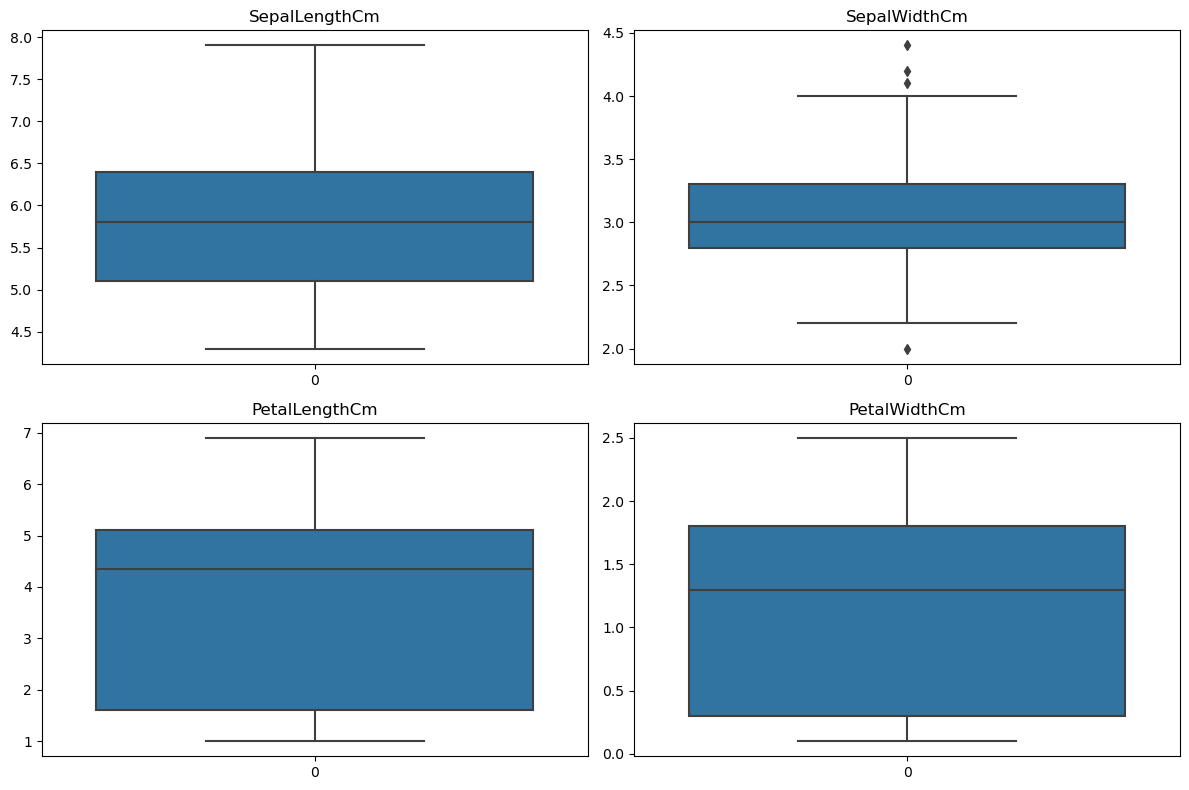

In [6]:
columns_to_plot = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over columns and corresponding subplot axes
for i, column in enumerate(columns_to_plot):
    sns.boxplot(df[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

In [7]:
x = df.drop(columns="Species",axis=1)
y=df["Species"]

In [8]:
x.shape

(150, 5)

In [9]:
# sepalWidth has outliers #model training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)



In [10]:
x_train.shape

(120, 5)

In [11]:
x_test.shape

(30, 5)

In [12]:
from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression(max_iter=1000)
log_r.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [13]:
#evaluation
ycap=log_r.predict(x_test)

In [14]:
y_test


114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
121     Iris-virginica
66     Iris-versicolor
24         Iris-setosa
8          Iris-setosa
126     Iris-virginica
22         Iris-setosa
44         Iris-setosa
97     Iris-versicolor
93     Iris-versicolor
26         Iris-setosa
Name: Species, dtype: object

In [15]:
#performance
from sklearn import metrics
metrics.accuracy_score(y_test,ycap)

1.0

# confusion matrix

In [16]:
#confusion matrix
metrics.confusion_matrix(y_test,ycap)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [17]:
#encoding for target variable #map,lable encoder
df["Species"]=df["Species"].map({"Iris-versicolor":1,"Iris-virginica":2,"Iris-setosa":3})

In [18]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,3
1,2,4.9,3.0,1.4,0.2,3
2,3,4.7,3.2,1.3,0.2,3
3,4,4.6,3.1,1.5,0.2,3
4,5,5.0,3.6,1.4,0.2,3


In [19]:
metrics.precision_score(y_test, ycap, average='micro')  # or 'macro', 'weighted', or None depending on your requirement


1.0

In [20]:
metrics.recall_score(y_test, ycap, average='micro')  # or 'macro', 'weighted', or None depending on your requirement


1.0

In [21]:
metrics.f1_score(y_test, ycap, average='micro')  # or 'macro', 'weighted', or None depending on your requirement


1.0